In [1]:
import pandas as pd
import json
from feature_selection.ga_feature_selection import run_ga_feature_selection
from feature_selection.elastic_net_feature_selection import run_elastic_net_selection

# Load dataset
df = pd.read_csv('data/wine.csv')
target_col = 'Type'

features = df.columns[1:-1].tolist()
target_col = df.columns[-1]

# Run GA feature selection
print("\n--- GA Feature Selection ---")
selected_features_ga, score = run_ga_feature_selection(
    df,
    feature_cols=features,
    target_col=target_col,
    classifier='logreg',
    n_gen=30
)
print(f"\nSelected features:\n  {selected_features_ga}")

# Run ElasticNet feature selection
print("\n--- ElasticNet Feature Selection ---")
selected_features_elastic, score = run_elastic_net_selection(
    df,
    feature_cols=features,
    target_col=target_col
)
print(f"\nSelected features:\n  {selected_features_elastic}")

# Save to JSON
with open("data/selected_features.json", "w") as f:
    json.dump(selected_features_ga, f)


--- GA Feature Selection ---
gen	nevals	avg     	max
0  	30    	0.937143	1  
1  	8     	0.956825	1  
2  	18    	0.961111	1  
3  	17    	0.976825	1  
4  	20    	0.989206	1  
5  	10    	0.994444	1  
6  	15    	0.983651	1  
7  	20    	0.99254 	1  
8  	19    	0.987937	1  
9  	19    	0.991429	1  
10 	23    	0.993333	1  
11 	12    	0.993492	1  
12 	24    	0.984603	1  
13 	15    	0.998889	1  
14 	15    	0.990317	1  
15 	22    	0.991111	1  
16 	16    	0.996984	1  
17 	17    	0.99127 	1  
18 	26    	0.994444	1  
19 	17    	0.997778	1  
20 	24    	0.991111	1  
21 	16    	0.995556	1  
22 	20    	0.995556	1  
23 	16    	0.995714	1  
24 	19    	0.995556	1  
25 	19    	0.99254 	1  
26 	19    	0.985714	1  
27 	17    	0.995714	1  
28 	15    	0.992222	1  
29 	18    	0.986825	1  
30 	19    	0.987143	1  

Selected features:
  ['U0_ShapeFactor_FAN', 'U10_Mean_SLOPE', 'U10_PeakValue_REGISTER', 'U10_RMS_SLOPE', 'U10_SNR_FAN', 'U1_CorrelationDim_FAN', 'U2_Skewness_REGISTER', 'U4_ApproxEntropy_FAN', 'U4_Clea

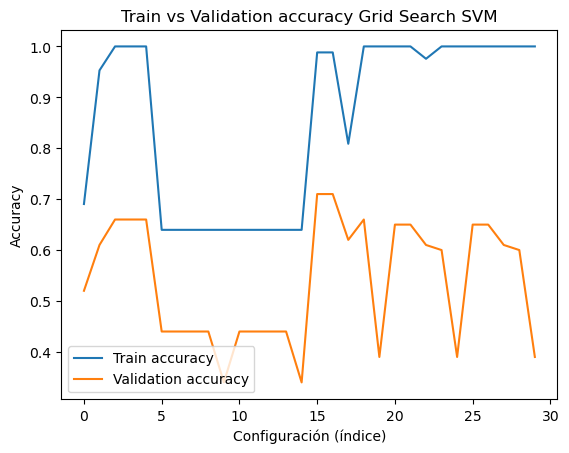


--- SVM Grid Search ---
Best Params: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Test Accuracy: 0.9


/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


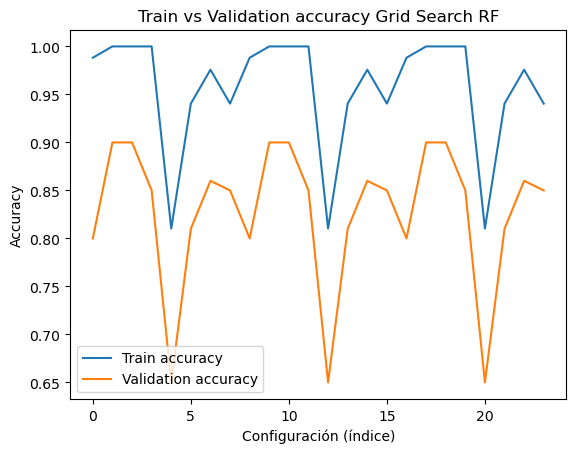

--- Random Forest Grid Search ---
Best Params: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 25}
Test Accuracy: 0.6

--- Optimizing SVM with GA ---
Gen 0 - Train acc avg: 0.7703, Val acc avg: 0.6744, Max val: 0.8667
Gen 1 - Train acc avg: 0.8728, Val acc avg: 0.7568, Max val: 0.8667
Gen 2 - Train acc avg: 0.9959, Val acc avg: 0.8650, Max val: 0.8667
Gen 3 - Train acc avg: 0.9968, Val acc avg: 0.8633, Max val: 0.8667
Gen 4 - Train acc avg: 0.9959, Val acc avg: 0.8620, Max val: 0.8667
Gen 5 - Train acc avg: 0.9992, Val acc avg: 0.8650, Max val: 0.8667
Gen 6 - Train acc avg: 1.0000, Val acc avg: 0.8667, Max val: 0.8667
Gen 7 - Train acc avg: 1.0000, Val acc avg: 0.8667, Max val: 0.8667
Gen 8 - Train acc avg: 0.9992, Val acc avg: 0.8650, Max val: 0.8667
Gen 9 - Train acc avg: 1.0000, Val acc avg: 0.8667, Max val: 0.8667
Gen 10 - Train acc avg: 1.0000, Val acc avg: 0.8667, Max val: 0.8667
Gen 11 - Train acc avg: 1.0000, Val acc avg: 0.8667, Max val: 0.8667
Gen 12 - Train acc avg:

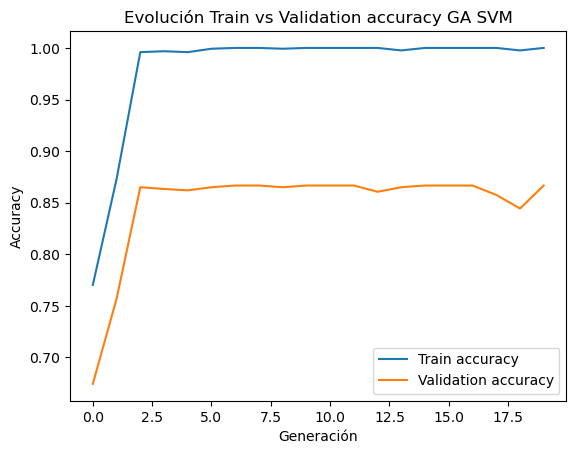

Best SVM Params: {'C': 247.95592109057606, 'gamma': 4.6450337644185374e-05}
Best SVM Accuracy: 0.8666666666666667

--- Optimizing Random Forest with GA ---
Gen 0 - Train acc avg: 1.0000, Val acc avg: 0.8364, Max val: 0.8364
Gen 1 - Train acc avg: 0.9992, Val acc avg: 0.8380, Max val: 0.8697
Gen 2 - Train acc avg: 0.9984, Val acc avg: 0.8397, Max val: 0.8697
Gen 3 - Train acc avg: 0.9952, Val acc avg: 0.8464, Max val: 0.8697
Gen 4 - Train acc avg: 0.9921, Val acc avg: 0.8530, Max val: 0.8697
Gen 5 - Train acc avg: 0.9889, Val acc avg: 0.8597, Max val: 0.8697
Gen 6 - Train acc avg: 0.9865, Val acc avg: 0.8647, Max val: 0.8697
Gen 7 - Train acc avg: 0.9889, Val acc avg: 0.8580, Max val: 0.8697
Gen 8 - Train acc avg: 0.9889, Val acc avg: 0.8597, Max val: 0.8697
Gen 9 - Train acc avg: 0.9873, Val acc avg: 0.8630, Max val: 0.8697
Gen 10 - Train acc avg: 0.9881, Val acc avg: 0.8614, Max val: 0.8697
Gen 11 - Train acc avg: 0.9873, Val acc avg: 0.8630, Max val: 0.8697
Gen 12 - Train acc avg: 0.

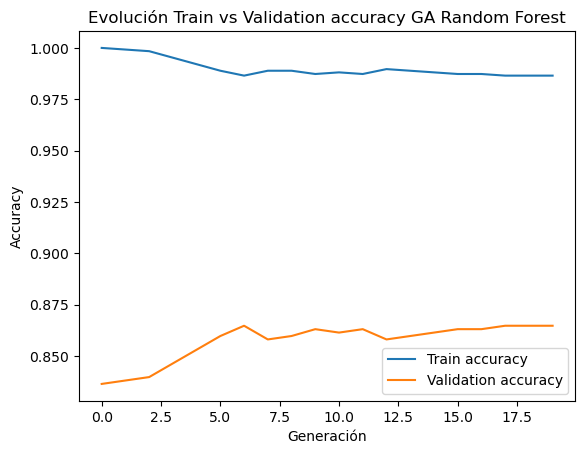

Best RF Params: {'n_estimators': 166, 'max_depth': 1}
Best RF Accuracy: 0.8696969696969696


In [2]:
from optimization.ga_svm import run_ga_svm
from optimization.ga_rf import run_ga_rf
from optimization.grid_search_rf import run_grid_search_rf
from optimization.grid_search_svm import run_grid_search_svm

# Option 1: Hyperparameter Optimization with GridSearch for SVM
svm_results = run_grid_search_svm(df, selected_features_ga, target_col)
print("\n--- SVM Grid Search ---")
print("Best Params:", svm_results['best_params'])
print("Test Accuracy:", svm_results['test_accuracy'])

# Option 2: Hyperparameter Optimization with GridSearch for Random Forest
rf_results = run_grid_search_rf(df, selected_features_ga, target_col)
print("--- Random Forest Grid Search ---")
print("Best Params:", rf_results['best_params'])
print("Test Accuracy:", rf_results['test_accuracy'])

# Option 3: Hyperparameter Optimization with GA for SVM
print("\n--- Optimizing SVM with GA ---")
svm_best_params, svm_best_score = run_ga_svm(df, selected_features_ga, target_col, n_gen=20, pop_size=20)
print("Best SVM Params:", svm_best_params)
print("Best SVM Accuracy:", svm_best_score)

# Option 4: Hyperparameter Optimization with GA for Random Forest
print("\n--- Optimizing Random Forest with GA ---")
rf_best_params, rf_best_score = run_ga_rf(df, selected_features_ga, target_col, n_gen=20, pop_size=20)
print("Best RF Params:", rf_best_params)
print("Best RF Accuracy:", rf_best_score)
